In [139]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# To impute missing Values
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler

import gc
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from statistics import mean

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [140]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [141]:
train = pd.read_csv('/content/train_CnA_Freshers (1)')
test = pd.read_csv('/content/C&A Freshers Orientation 2021.csv')

In [142]:
test_eda = test.copy()

In [143]:
train.shape, test.shape

((15135, 80), (329, 45))

In [144]:
train.head(5)

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,voted,married,familysize,major,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy
0,811406,4,5,5,4,5,4,5,3,4,3,3,4,5,5,5,5,5,4,5,5,1,2,5,4,3,4,US,3,85,155,1,5,5,1,4,7,2,7,4,7,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,2,1,1,16,1366,768,1,7,1,2,1,3,NaN,0,0,0,1,0,0,0,0,6
1,248038,4,3,3,2,5,3,3,5,4,5,1,1,3,3,3,2,3,3,4,3,3,3,5,5,1,3,CA,23,148,230,5,4,3,7,7,5,6,6,3,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,3,2,2,19,360,640,1,8,1,2,1,2,NaN,0,1,0,0,0,0,0,0,4
2,847531,5,5,5,5,5,5,5,5,4,3,5,5,3,2,5,5,5,4,5,2,4,1,4,5,4,3,CH,267,87,176,5,6,6,5,7,6,6,6,3,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,4,2,3,2,24,1440,900,1,12,5,2,1,1,Buisiness Studies,Art,Geography,Biology,G,0,0,0,1,0
3,708422,1,1,3,1,4,4,5,1,3,2,3,4,5,5,1,4,4,5,1,4,1,2,4,4,4,5,US,5,94,181,2,3,7,1,5,6,6,1,7,6,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,3,2,2,2,56,1366,768,1,1,1,1,2,3,economics,0,0,0,1,0,0,0,0,4
4,269597,5,1,2,5,4,2,4,4,3,1,1,4,2,4,1,1,1,1,2,5,5,1,5,4,4,5,NL,25,115,127,5,4,7,3,6,3,1,1,7,6,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,2,3,1,2,16,1600,900,1,1,1,2,1,3,Currently attending programming,0,0,0,1,0,0,0,0,5


In [145]:
test.head()

,Timestamp,Name,IITG Outlook Email ID,Roll Number,State,Branch,Gender,Attendance Percentage you're aiming at in your first semester?,How much are you interested in your branch?,How many hours do you sleep?,Study Preference,I am interested in science.,My appearance is not as important as my intelligence.,I prefer academic success to social success.,I spend recreational time researching topics others might find dry or overly rigorous.,I would rather read a book than go to a party.,I am more comfortable with my hobbies than I am with other people.,I spend more time at the library than any other public place.,I like to read technology news reports.,I gravitate towards introspection.,I am more comfortable interacting online than in person.,I love to read challenging material.,I have played a lot of games.,I sometimes prefer fictional people to real ones.,I enjoy learning more than I need to.,I get excited about my ideas and research.,I am a strange person.,I care about super heroes.,I can be socially awkward at times.,I see myself as: _____ [Extraverted enthusiastic.],"I see myself as: _____ [Critical, quarrelsome.]","I see myself as: _____ [Dependable, self-disciplined.]","I see myself as: _____ [Anxious, easily upset.]","I see myself as: _____ [Open to new experiences, complex.]","I see myself as: _____ [Reserved, quiet.]","I see myself as: _____ [Sympathetic, warm.]","I see myself as: _____ [Disorganized, careless.]","I see myself as: _____ [Calm, emotionally stable.]","I see myself as: _____ [Conventional, uncreative.]","In the grid below, check all the words whose definitions you are sure you know (Don't search the meanings in Dictionary/Google please :) )",Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,2021/12/23 1:51:30 AM GMT+5:30,Gsgs,NaN,NaN,Bihar,EEE,Male,>90 %,4,<=9 hours,Group study,4,5,4,1,4.0,1,4,5,5,5,5,5,5,5,5,5,5,5,Disagree a Little,Disagree Moderately,Disagree Strongly,Disagree a Little,Disagree Moderately,Disagree Strongly,Disagree a Little,Disagree Moderately,Disagree Moderately,Disagree Moderately,Robot;Cuivocal;Paucity,Disagree a Little,5.0,1.0,5.0,5.0
1,2021/12/23 1:44:22 PM GMT+5:30,Lokesh,NaN,NaN,Bihar,Mechanical,Male,<90%,2,<=8 hours,Individual study,3,4,4,3,1.0,3,1,3,3,2,4,4,2,1,3,4,2,5,Disagree a Little,Disagree Moderately,Agree a Little,Disagree Moderately,Agree Moderately,Agree Moderately,Agree Moderately,Disagree a Little,Agree Moderately,Agree Moderately,Boat;Incoherent;Robot;Audible;Verborse;Abysmal...,Neutral,2.0,4.0,2.0,2.0
2,2021/12/23 1:45:07 PM GMT+5:30,Amon,NaN,NaN,Maharashtra,Mechanical,Male,>90 %,4,<=8 hours,Individual study,4,3,3,1,1.0,3,4,1,3,2,2,2,4,2,4,3,3,5,Neutral,Disagree a Little,Agree a Little,Agree Moderately,Agree a Little,Agree Moderately,Neutral,Agree a Little,Agree Moderately,Disagree Moderately,Boat;Incoherent;Robot;Audible;Abysmal;Lucid;Be...,Neutral,3.0,4.0,2.0,3.0
3,2021/12/23 1:57:02 PM GMT+5:30,Mansi,NaN,NaN,Karnataka,CST,Female,<90%,4,<=7 hours,Individual study,3,4,3,2,5.0,5,2,2,4,5,3,1,5,3,4,3,2,5,Disagree Strongly,Disagree a Little,Disagree Moderately,Disagree a Little,Disagree a Little,Disagree a Little,Disagree a Little,Disagree a Little,Disagree Moderately,Disagree Moderately,Boat;Incoherent;Robot;Audible;Abysmal;Lucid;Be...,Disagree a Little,3.0,4.0,2.0,3.0
4,2021/12/23 1:59:11 PM GMT+5:30,Advaith Krishna A,NaN,NaN,Kerala,CST,Male,>90 %,4,<=10 hours,Individual study,5,5,5,4,5.0,5,2,5,5,5,5,5,4,4,4,1,3,5,Agree Strongly,Agree Strongly,Agree Strongly,Agree Moderately,Agree Strongly,Agree Moderately,Agree Moderately,Agree Strongly,Agree Strongly,Agree Strongly,Robot;Audible;Lucid,Agree Moderately,5.0,5.0,3.0,5.0


In [146]:
test.columns

Index(['Timestamp', 'Name', 'IITG Outlook Email ID', 'Roll Number', 'State',
       'Branch', 'Gender',
       'Attendance Percentage you're aiming at in your first semester?',
       'How much are you interested in your branch?',
       'How many hours do you sleep?', 'Study Preference ',
       'I am interested in science.',
       'My appearance is not as important as my intelligence.',
       'I prefer academic success to social success.',
       'I spend recreational time researching topics others might find dry or overly rigorous.',
       'I would rather read a book than go to a party.',
       'I am more comfortable with my hobbies than I am with other people.',
       'I spend more time at the library than any other public place.',
       'I like to read technology news reports.',
       'I gravitate towards introspection.',
       'I am more comfortable interacting online than in person.',
       'I love to read challenging material.', 'I have played a lot of games.',
       

In [147]:
test=test.drop(['Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 43','Unnamed: 44'],axis=1)

In [148]:
test=test.drop(['Timestamp','Name','Roll Number','Branch','Study Preference ','IITG Outlook Email ID'
,'State',"Attendance Percentage you're aiming at in your first semester?","How much are you interested in your branch?"
,"How many hours do you sleep?"],axis=1)

In [149]:
test[ "I see myself as: _____ [Extraverted enthusiastic.]"].replace({'Disagree Strongly': 1,
                                                                      "Disagree Moderately": 2,
                                                                      "Disagree a Little": 3,
                                                                      "Neutral": 4,
                                                                      "Agree a Little": 5,
                                                                      "Agree Moderately": 6,
                                                                      "Agree Strongly": 7},inplace=True)
test[ "I see myself as: _____ [Critical, quarrelsome.]"].replace({'Disagree Strongly': 1,
                                                                      "Disagree Moderately": 2,
                                                                      "Disagree a Little": 3,
                                                                      "Neutral": 4,
                                                                      "Agree a Little": 5,
                                                                      "Agree Moderately": 6,
                                                                      "Agree Strongly": 7},inplace=True)
test[ "I see myself as: _____ [Dependable, self-disciplined.]"].replace({'Disagree Strongly': 1,
                                                                      "Disagree Moderately": 2,
                                                                      "Disagree a Little": 3,
                                                                      "Neutral": 4,
                                                                      "Agree a Little": 5,
                                                                      "Agree Moderately": 6,
                                                                      "Agree Strongly": 7},inplace=True)
test[ "I see myself as: _____ [Anxious, easily upset.]"].replace({'Disagree Strongly': 1,
                                                                      "Disagree Moderately": 2,
                                                                      "Disagree a Little": 3,
                                                                      "Neutral": 4,
                                                                      "Agree a Little": 5,
                                                                      "Agree Moderately": 6,
                                                                      "Agree Strongly": 7},inplace=True)
test[ "I see myself as: _____ [Open to new experiences, complex.]"].replace({'Disagree Strongly': 1,
                                                                      "Disagree Moderately": 2,
                                                                      "Disagree a Little": 3,
                                                                      "Neutral": 4,
                                                                      "Agree a Little": 5,
                                                                      "Agree Moderately": 6,
                                                                      "Agree Strongly": 7},inplace=True)
test[ "I see myself as: _____ [Reserved, quiet.]"].replace({'Disagree Strongly': 1,
                                                                      "Disagree Moderately": 2,
                                                                      "Disagree a Little": 3,
                                                                      "Neutral": 4,
                                                                      "Agree a Little": 5,
                                                                      "Agree Moderately": 6,
                                                                      "Agree Strongly": 7},inplace=True)
test[ "I see myself as: _____ [Sympathetic, warm.]"].replace({'Disagree Strongly': 1,
                                                                      "Disagree Moderately": 2,
                                                                      "Disagree a Little": 3,
                                                                      "Neutral": 4,
                                                                      "Agree a Little": 5,
                                                                      "Agree Moderately": 6,
                                                                      "Agree Strongly": 7},inplace=True)
test[ "I see myself as: _____ [Calm, emotionally stable.]"].replace({'Disagree Strongly': 1,
                                                                      "Disagree Moderately": 2,
                                                                      "Disagree a Little": 3,
                                                                      "Neutral": 4,
                                                                      "Agree a Little": 5,
                                                                      "Agree Moderately": 6,
                                                                      "Agree Strongly": 7},inplace=True)
test[ "I see myself as: _____ [Conventional, uncreative.]"].replace({'Disagree Strongly': 1,
                                                                      "Disagree Moderately": 2,
                                                                      "Disagree a Little": 3,
                                                                      "Neutral": 4,
                                                                      "Agree a Little": 5,
                                                                      "Agree Moderately": 6,
                                                                      "Agree Strongly": 7},inplace=True)
test[ "I see myself as: _____ [Disorganized, careless.]"].replace({'Disagree Strongly': 1,
                                                                      "Disagree Moderately": 2,
                                                                      "Disagree a Little": 3,
                                                                      "Neutral": 4,
                                                                      "Agree a Little": 5,
                                                                      "Agree Moderately": 6,
                                                                      "Agree Strongly": 7},inplace=True)




In [150]:
test.rename(columns={'I see myself as: _____ [Extraverted enthusiastic.]':"TIPI1",
                     "I see myself as: _____ [Critical, quarrelsome.]":"TIPI2",
                     "I see myself as: _____ [Dependable, self-disciplined.]":"TIPI3",
                     "I see myself as: _____ [Anxious, easily upset.]":"TIPI4",
                     "I see myself as: _____ [Open to new experiences, complex.]":"TIPI5",
                     "I see myself as: _____ [Reserved, quiet.]":"TIPI6",
                     "I see myself as: _____ [Sympathetic, warm.]":"TIPI7",
                     "I see myself as: _____ [Disorganized, careless.]":"TIPI8",
                     "I see myself as: _____ [Calm, emotionally stable.]":"TIPI9",
                     "I see myself as: _____ [Conventional, uncreative.]":"TIPI10"},inplace=True)

In [151]:
test.rename(columns={"I am interested in science.":"Q1",
      "My appearance is not as important as my intelligence.":"Q2",
      "I prefer academic success to social success.":"Q3",
      "I spend recreational time researching topics others might find dry or overly rigorous.":"Q4",
      "I would rather read a book than go to a party.":"Q5",
      "I am more comfortable with my hobbies than I am with other people.":"Q6",
      "I spend more time at the library than any other public place.":"Q7",
      "I like to read technology news reports.":"Q8",
      "I gravitate towards introspection.":"Q9",
      "I am more comfortable interacting online than in person.":"Q10",
      "I love to read challenging material.":"Q11",
      "I have played a lot of games.":"Q12",
      "I sometimes prefer fictional people to real ones.":"Q13",
      "I enjoy learning more than I need to.":"Q14",
      "I get excited about my ideas and research.":"Q15",
      "I am a strange person.":"Q16",
      "I care about super heroes.":"Q17",
      "I can be socially awkward at times.":"Q18",},inplace=True)

In [152]:
test.rename(columns = {"In the grid below, check all the words whose definitions you are sure you know (Don't search the meanings in Dictionary/Google please :) )":'Boat'}, inplace = True)
test['Incoherent'] = test["Boat"]
test["Incoherent"]=test["Incoherent"].str.contains("Incoherent")

test['Pallid'] = test["Boat"]
test["Pallid"]=test["Pallid"].str.contains("Pallid")

test['Robot'] = test["Boat"]
test["Robot"]=test["Robot"].str.contains("Robot")

test['Audible'] = test["Boat"]
test["Audible"]=test["Audible"].str.contains("Audible")

test['Cuivocal'] = test["Boat"]
test["Cuivocal"]=test["Cuivocal"].str.contains("Cuivocal")

test['Paucity'] = test["Boat"]
test["Paucity"]=test["Paucity"].str.contains("Paucity")

test['Epistemology'] = test["Boat"]
test["Epistemology"]=test["Epistemology"].str.contains("Epistemology")

test['Florted'] = test["Boat"]
test["Florted"]=test["Florted"].str.contains("Florted")

test['Pastiche'] = test["Boat"]
test["Pastiche"]=test["Pastiche"].str.contains("Pastiche")

test['Verborse'] = test["Boat"]
test["Verborse"]=test["Verborse"].str.contains("Verborse")

test['Abysmal'] = test["Boat"]
test["Abysmal"]=test["Abysmal"].str.contains("Abysmal")

test['Lucid'] = test["Boat"]
test["Lucid"]=test["Lucid"].str.contains("Lucid")

test['Betray'] = test["Boat"]
test["Betray"]=test["Betray"].str.contains("Betray")

test["Boat"]=test["Boat"].str.contains("Boat")


In [153]:
test[['Boat','Incoherent',	'Pallid',	'Robot',	'Audible'	,'Cuivocal'	
      ,'Paucity',	'Epistemology'	,'Florted'	,'Pastiche'	,
      'Verborse','Abysmal','Lucid','Betray']]=test[['Boat','Incoherent',	'Pallid',	'Robot',	'Audible'	,'Cuivocal'	
      ,'Paucity',	'Epistemology'	,'Florted'	,'Pastiche'	,
      'Verborse','Abysmal','Lucid','Betray']]*1
      

In [154]:
test[['VCL10','VCL16','married']] = 1
test['education'] = 3
test['urban'] = 3
test['engnat'] = 2
test['age'] = 18
test[['voted','ASD']] = 2
test['race_asian'] = 1
test[['race_arab', 'race_black','race_white','race_hispanic','race_nativeam','race_nativeau', 'race_other']]= 0

In [155]:
test['country']='IN'


In [156]:
cols=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18','country','TIPI1',
       'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9',
       'TIPI10','Boat','Incoherent','Pallid', 'Robot',
       'Audible', 'Cuivocal', 'Paucity', 'Epistemology', 'Florted','VCL10', 'Pastiche',
       'Verborse', 'Abysmal', 'Lucid', 'Betray','VCL16','education', 'urban','Gender',
      'engnat', 'age', 'voted','married','race_arab','race_asian','race_black', 'race_white'
      , 'race_hispanic', 'race_nativeam','race_nativeau', 'race_other'
      ]

In [157]:
test.columns

Index(['Gender', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'TIPI1',
       'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9',
       'TIPI10', 'Boat', 'Incoherent', 'Pallid', 'Robot', 'Audible',
       'Cuivocal', 'Paucity', 'Epistemology', 'Florted', 'Pastiche',
       'Verborse', 'Abysmal', 'Lucid', 'Betray', 'VCL10', 'VCL16', 'married',
       'education', 'urban', 'engnat', 'age', 'voted', 'ASD', 'race_asian',
       'race_arab', 'race_black', 'race_white', 'race_hispanic',
       'race_nativeam', 'race_nativeau', 'race_other', 'country'],
      dtype='object')

In [158]:
test=test[cols]

In [159]:
test.shape

(329, 60)

In [160]:
test.rename(columns={'VCL10':'Decide','VCL16':'Funny','Gender':'gender'},inplace=True)

In [161]:
y_train=train['nerdy']
train = train.drop(['Q2','Q3','Q5','Q7','Q9','Q13','Q15','Q20','introelapse','testelapse','surveyelapse','hand','religion','orientation','familysize','major','screenh','screenw','nerdy','id'], axis = 1)

In [162]:
train.rename(columns={'Q4':'Q2',"Q6":"Q3","Q8":"Q4","Q10":"Q5","Q11":"Q6","Q12":"Q7","Q14":"Q8",
              "Q16":"Q9","Q17":"Q10","18":"11","19":"12","21":"Q13","Q22":"Q14","23":"Q15",
              "Q24":"Q16","Q25":"Q17","Q26":"Q18"},inplace=True)

train.rename(columns={'VCL1':'Boat','VCL2':'Incoherent','VCL3':'Pallid','VCL4':'Robot','VCL5':'Audible',
                      'VCL6':'Cuivocal','VCL7':'Paucity','VCL8':'Epistemology','VCL9':'Florted',
                      'VCL10':'Decide','VCL11':'Pastiche','VCL12':'Verborse','VCL13':'Abysmal',
                      'VCL14':'Lucid','VCL15':'Betray','VCL16':'Funny'},inplace=True)



In [163]:
test.columns,train.columns

(Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
        'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'country', 'TIPI1',
        'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9',
        'TIPI10', 'Boat', 'Incoherent', 'Pallid', 'Robot', 'Audible',
        'Cuivocal', 'Paucity', 'Epistemology', 'Florted', 'Decide', 'Pastiche',
        'Verborse', 'Abysmal', 'Lucid', 'Betray', 'Funny', 'education', 'urban',
        'gender', 'engnat', 'age', 'voted', 'married', 'race_arab',
        'race_asian', 'race_black', 'race_white', 'race_hispanic',
        'race_nativeam', 'race_nativeau', 'race_other'],
       dtype='object'),
 Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q18',
        'Q19', 'Q21', 'Q14', 'Q23', 'Q16', 'Q17', 'Q18', 'country', 'TIPI1',
        'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9',
        'TIPI10', 'Boat', 'Incoherent', 'Pallid', 'Robot', 'Audible',
        'Cuivocal

In [164]:
train.dtypes,test.dtypes

(Q1                int64
 Q2                int64
 Q3                int64
 Q4                int64
 Q5                int64
 Q6                int64
 Q7                int64
 Q8                int64
 Q9                int64
 Q10               int64
 Q18               int64
 Q19               int64
 Q21               int64
 Q14               int64
 Q23               int64
 Q16               int64
 Q17               int64
 Q18               int64
 country          object
 TIPI1             int64
 TIPI2             int64
 TIPI3             int64
 TIPI4             int64
 TIPI5             int64
 TIPI6             int64
 TIPI7             int64
 TIPI8             int64
 TIPI9             int64
 TIPI10            int64
 Boat              int64
 Incoherent        int64
 Pallid            int64
 Robot             int64
 Audible           int64
 Cuivocal          int64
 Paucity           int64
 Epistemology      int64
 Florted           int64
 Decide            int64
 Pastiche          int64


In [165]:
train[['race_arab']] = train[['race_arab']].apply(pd.to_numeric, errors='coerce')
train[['race_asian']] = train[['race_asian']].apply(pd.to_numeric, errors='coerce')
train[['race_black']] = train[['race_black']].apply(pd.to_numeric, errors='coerce')
train[['race_white']] = train[['race_white']].apply(pd.to_numeric, errors='coerce')

train['race_arab'] = train['race_arab'].replace(np.nan, -1)
train['race_asian'] = train['race_asian'].replace(np.nan, -1)
train['race_black'] = train['race_black'].replace(np.nan, -1)
train['race_white'] = train['race_white'].replace(np.nan, -1)

In [166]:
train.dtypes

Q1                 int64
Q2                 int64
Q3                 int64
Q4                 int64
Q5                 int64
Q6                 int64
Q7                 int64
Q8                 int64
Q9                 int64
Q10                int64
Q18                int64
Q19                int64
Q21                int64
Q14                int64
Q23                int64
Q16                int64
Q17                int64
Q18                int64
country           object
TIPI1              int64
TIPI2              int64
TIPI3              int64
TIPI4              int64
TIPI5              int64
TIPI6              int64
TIPI7              int64
TIPI8              int64
TIPI9              int64
TIPI10             int64
Boat               int64
Incoherent         int64
Pallid             int64
Robot              int64
Audible            int64
Cuivocal           int64
Paucity            int64
Epistemology       int64
Florted            int64
Decide             int64
Pastiche           int64


In [167]:
convert_dict = {'race_arab': int,
                'race_asian': int,
                'race_black': int,
                'race_white': int,
               }
  
train = train.astype(convert_dict)

In [168]:
test.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,country,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Boat,Incoherent,Pallid,Robot,Audible,Cuivocal,Paucity,Epistemology,Florted,Decide,Pastiche,Verborse,Abysmal,Lucid,Betray,Funny,education,urban,gender,engnat,age,voted,married,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other
0,4,5,4,1,4.0,1,4,5,5,5,5,5,5,5,5,5,5,5,IN,3,2,1,3,2,1,3,2,2,2,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,3,3,Male,2,18,2,1,0,1,0,0,0,0,0,0
1,3,4,4,3,1.0,3,1,3,3,2,4,4,2,1,3,4,2,5,IN,3,2,5,2,6,6,6,3,6,6,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,1,3,3,Male,2,18,2,1,0,1,0,0,0,0,0,0
2,4,3,3,1,1.0,3,4,1,3,2,2,2,4,2,4,3,3,5,IN,4,3,5,6,5,6,4,5,6,2,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,3,3,Male,2,18,2,1,0,1,0,0,0,0,0,0
3,3,4,3,2,5.0,5,2,2,4,5,3,1,5,3,4,3,2,5,IN,1,3,2,3,3,3,3,3,2,2,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,3,3,Female,2,18,2,1,0,1,0,0,0,0,0,0
4,5,5,5,4,5.0,5,2,5,5,5,5,5,4,4,4,1,3,5,IN,7,7,7,6,7,6,6,7,7,7,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,3,3,Male,2,18,2,1,0,1,0,0,0,0,0,0


In [169]:
# test['gender'] = test['gender'].apply(lambda x : 1 if x=='Male')
# test['gender'] = test['gender'].apply(lambda x : 2 if x=='Female')
# test['gender'] = test['gender'].apply(lambda x : 3 if x=='Other')

test.loc[test.gender == "Male", "gender"] = 1
test.loc[test.gender == "Female", "gender"] = 2
test.loc[test.gender == "Other", "gender"] = 3


# convert_dict1={'Q5':int}
# test = test.astype(convert_dict1)

In [170]:
type(train)

pandas.core.frame.DataFrame

In [171]:
test.loc[test.Q5>5,:]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,country,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Boat,Incoherent,Pallid,Robot,Audible,Cuivocal,Paucity,Epistemology,Florted,Decide,Pastiche,Verborse,Abysmal,Lucid,Betray,Funny,education,urban,gender,engnat,age,voted,married,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other


In [172]:
test.isnull().sum()

Q1               0
Q2               0
Q3               0
Q4               0
Q5               5
Q6               0
Q7               0
Q8               0
Q9               0
Q10              0
Q11              0
Q12              0
Q13              0
Q14              0
Q15              0
Q16              0
Q17              0
Q18              0
country          0
TIPI1            0
TIPI2            0
TIPI3            0
TIPI4            0
TIPI5            0
TIPI6            0
TIPI7            0
TIPI8            0
TIPI9            0
TIPI10           0
Boat             0
Incoherent       0
Pallid           0
Robot            0
Audible          0
Cuivocal         0
Paucity          0
Epistemology     0
Florted          0
Decide           0
Pastiche         0
Verborse         0
Abysmal          0
Lucid            0
Betray           0
Funny            0
education        0
urban            0
gender           0
engnat           0
age              0
voted            0
married          0
race_arab   

In [173]:
test.dropna(inplace=True)

In [174]:
convert_dict1={'Q5':int,
               'gender':int}
test = test.astype(convert_dict1)

In [175]:
test.dtypes

Q1                int64
Q2                int64
Q3                int64
Q4                int64
Q5                int64
Q6                int64
Q7                int64
Q8                int64
Q9                int64
Q10               int64
Q11               int64
Q12               int64
Q13               int64
Q14               int64
Q15               int64
Q16               int64
Q17               int64
Q18               int64
country          object
TIPI1             int64
TIPI2             int64
TIPI3             int64
TIPI4             int64
TIPI5             int64
TIPI6             int64
TIPI7             int64
TIPI8             int64
TIPI9             int64
TIPI10            int64
Boat              int64
Incoherent        int64
Pallid            int64
Robot             int64
Audible           int64
Cuivocal          int64
Paucity           int64
Epistemology      int64
Florted           int64
Decide            int64
Pastiche          int64
Verborse          int64
Abysmal         

In [176]:
train['country'].value_counts()

US      7551
GB      1101
CA       930
AU       550
DE       439
PH       255
IN       236
BR       229
PL       224
NONE     204
FR       201
IT       194
NL       168
SE       149
NZ       141
MX       130
FI       116
NO       109
ES       108
MY       107
ID       103
DK        90
RO        89
IE        88
SG        82
AR        75
RU        69
CZ        67
TR        66
PT        59
BE        56
AT        54
ZA        53
HU        53
GR        53
CH        50
CL        42
RS        40
IL        39
HK        39
JP        32
HR        31
BG        27
KR        26
CO        25
TH        24
LV        24
PK        24
LT        24
AE        23
VN        22
SK        20
VE        20
SI        16
SA        16
IR        15
CR        14
UA        14
BA        13
PR        13
KE        12
NG        12
EE        12
TW        12
UY        11
PE        10
AL         9
MA         9
JO         9
CN         9
DZ         8
KW         8
QA         8
GE         7
BD         7
JM         6
LB         6

In [177]:
train.drop('country',inplace=True,axis=1)
test.drop('country',inplace=True,axis=1)


In [178]:
test_eda.head()

,Timestamp,Name,IITG Outlook Email ID,Roll Number,State,Branch,Gender,Attendance Percentage you're aiming at in your first semester?,How much are you interested in your branch?,How many hours do you sleep?,Study Preference,I am interested in science.,My appearance is not as important as my intelligence.,I prefer academic success to social success.,I spend recreational time researching topics others might find dry or overly rigorous.,I would rather read a book than go to a party.,I am more comfortable with my hobbies than I am with other people.,I spend more time at the library than any other public place.,I like to read technology news reports.,I gravitate towards introspection.,I am more comfortable interacting online than in person.,I love to read challenging material.,I have played a lot of games.,I sometimes prefer fictional people to real ones.,I enjoy learning more than I need to.,I get excited about my ideas and research.,I am a strange person.,I care about super heroes.,I can be socially awkward at times.,I see myself as: _____ [Extraverted enthusiastic.],"I see myself as: _____ [Critical, quarrelsome.]","I see myself as: _____ [Dependable, self-disciplined.]","I see myself as: _____ [Anxious, easily upset.]","I see myself as: _____ [Open to new experiences, complex.]","I see myself as: _____ [Reserved, quiet.]","I see myself as: _____ [Sympathetic, warm.]","I see myself as: _____ [Disorganized, careless.]","I see myself as: _____ [Calm, emotionally stable.]","I see myself as: _____ [Conventional, uncreative.]","In the grid below, check all the words whose definitions you are sure you know (Don't search the meanings in Dictionary/Google please :) )",Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,2021/12/23 1:51:30 AM GMT+5:30,Gsgs,NaN,NaN,Bihar,EEE,Male,>90 %,4,<=9 hours,Group study,4,5,4,1,4.0,1,4,5,5,5,5,5,5,5,5,5,5,5,Disagree a Little,Disagree Moderately,Disagree Strongly,Disagree a Little,Disagree Moderately,Disagree Strongly,Disagree a Little,Disagree Moderately,Disagree Moderately,Disagree Moderately,Robot;Cuivocal;Paucity,Disagree a Little,5.0,1.0,5.0,5.0
1,2021/12/23 1:44:22 PM GMT+5:30,Lokesh,NaN,NaN,Bihar,Mechanical,Male,<90%,2,<=8 hours,Individual study,3,4,4,3,1.0,3,1,3,3,2,4,4,2,1,3,4,2,5,Disagree a Little,Disagree Moderately,Agree a Little,Disagree Moderately,Agree Moderately,Agree Moderately,Agree Moderately,Disagree a Little,Agree Moderately,Agree Moderately,Boat;Incoherent;Robot;Audible;Verborse;Abysmal...,Neutral,2.0,4.0,2.0,2.0
2,2021/12/23 1:45:07 PM GMT+5:30,Amon,NaN,NaN,Maharashtra,Mechanical,Male,>90 %,4,<=8 hours,Individual study,4,3,3,1,1.0,3,4,1,3,2,2,2,4,2,4,3,3,5,Neutral,Disagree a Little,Agree a Little,Agree Moderately,Agree a Little,Agree Moderately,Neutral,Agree a Little,Agree Moderately,Disagree Moderately,Boat;Incoherent;Robot;Audible;Abysmal;Lucid;Be...,Neutral,3.0,4.0,2.0,3.0
3,2021/12/23 1:57:02 PM GMT+5:30,Mansi,NaN,NaN,Karnataka,CST,Female,<90%,4,<=7 hours,Individual study,3,4,3,2,5.0,5,2,2,4,5,3,1,5,3,4,3,2,5,Disagree Strongly,Disagree a Little,Disagree Moderately,Disagree a Little,Disagree a Little,Disagree a Little,Disagree a Little,Disagree a Little,Disagree Moderately,Disagree Moderately,Boat;Incoherent;Robot;Audible;Abysmal;Lucid;Be...,Disagree a Little,3.0,4.0,2.0,3.0
4,2021/12/23 1:59:11 PM GMT+5:30,Advaith Krishna A,NaN,NaN,Kerala,CST,Male,>90 %,4,<=10 hours,Individual study,5,5,5,4,5.0,5,2,5,5,5,5,5,4,4,4,1,3,5,Agree Strongly,Agree Strongly,Agree Strongly,Agree Moderately,Agree Strongly,Agree Moderately,Agree Moderately,Agree Strongly,Agree Strongly,Agree Strongly,Robot;Audible;Lucid,Agree Moderately,5.0,5.0,3.0,5.0


In [179]:
test_eda=test_eda.drop(['Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 43','Unnamed: 44'],axis=1)

In [180]:
test_eda = test_eda[pd.notnull(test_eda['Roll Number'])]
# test_eda.dropna(inplace=True)

In [181]:
test_eda.shape,test.shape

((324, 40), (324, 59))

In [182]:
scaler = MinMaxScaler()
train_preds = scaler.fit_transform(train)
test_preds = scaler.transform(test)

In [183]:
def Stacker(model, model_name, fold):  
    test_preds = np.zeros(test.shape[0])
    train_preds = np.zeros(train.shape[0])

    kf = StratifiedKFold(n_splits=fold,random_state=48,shuffle=True)
    mse=[]
    n=0

    for train_index, test_index in kf.split(train,y_train):

        X_train, X_valid = train.iloc[train_index], train.iloc[test_index]
        y_train1, y_valid = y_train.iloc[train_index], y_train.iloc[test_index]

        if model_name == 'catb':
            model.fit(X_train, y_train1, eval_set=[(X_valid, y_valid)], silent=True)
        elif model_name == 'rad':
            model.fit(X_train, y_train1)
        else:
            model.fit(X_train, y_train1, eval_set=[(X_valid, y_valid)], verbose=False)
        
        test_preds += model.predict(test)/kf.n_splits
        train_preds += model.predict(train)/kf.n_splits

        mse.append(mean_squared_error(y_valid, model.predict(X_valid)))
        
        gc.collect()

        print(f"fold: {n+1}, mse: {mse[n]}")
        n+=1
    
    print('Average = ', mean(mse))
    return train_preds, test_preds

In [184]:
lgbm = LGBMRegressor()
lgbm_train, lgbm_test = Stacker(lgbm, 'lgbm', 5)
del lgbm
gc.collect()


fold: 1, mse: 1.2990318871105528
fold: 2, mse: 1.2853627119541926
fold: 3, mse: 1.296253350503824
fold: 4, mse: 1.3409120141036481
fold: 5, mse: 1.260597717865522
Average =  1.296431536307548


0

In [185]:
test['nerdy']=lgbm_test

In [186]:
test.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Boat,Incoherent,Pallid,Robot,Audible,Cuivocal,Paucity,Epistemology,Florted,Decide,Pastiche,Verborse,Abysmal,Lucid,Betray,Funny,education,urban,gender,engnat,age,voted,married,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy
0,4,5,4,1,4,1,4,5,5,5,5,5,5,5,5,5,5,5,3,2,1,3,2,1,3,2,2,2,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,3,3,1,2,18,2,1,0,1,0,0,0,0,0,0,5.150029
1,3,4,4,3,1,3,1,3,3,2,4,4,2,1,3,4,2,5,3,2,5,2,6,6,6,3,6,6,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,1,3,3,1,2,18,2,1,0,1,0,0,0,0,0,0,4.877647
2,4,3,3,1,1,3,4,1,3,2,2,2,4,2,4,3,3,5,4,3,5,6,5,6,4,5,6,2,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,3,3,1,2,18,2,1,0,1,0,0,0,0,0,0,4.316152
3,3,4,3,2,5,5,2,2,4,5,3,1,5,3,4,3,2,5,1,3,2,3,3,3,3,3,2,2,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,3,3,2,2,18,2,1,0,1,0,0,0,0,0,0,4.281628
4,5,5,5,4,5,5,2,5,5,5,5,5,4,4,4,1,3,5,7,7,7,6,7,6,6,7,7,7,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,3,3,1,2,18,2,1,0,1,0,0,0,0,0,0,6.024830


In [187]:
type(train)

pandas.core.frame.DataFrame

In [188]:
Q_cols={"Q1":"I am interested in science.",
      "Q2":"My appearance is not as important as my intelligence.",
      "Q3":"I prefer academic success to social success.",
      "Q4":"I spend recreational time researching topics others might find dry or overly rigorous.",
      "Q5":"I would rather read a book than go to a party.",
      "Q6":"I am more comfortable with my hobbies than I am with other people.",
      "Q7":"I spend more time at the library than any other public place.",
      "Q8":"I like to read technology news reports.",
      "Q9":"I gravitate towards introspection.",
      "Q10":"I am more comfortable interacting online than in person.",
      "Q11":"I love to read challenging material.",
      "Q12":"I have played a lot of video games.",
      "Q13":"I sometimes prefer fictional people to real ones.",
      "Q14":"I enjoy learning more than I need to.",
      "Q15":"I get excited about my ideas and research.",
      "Q16":"I am a strange person.",
      "Q17":"I care about super heroes.",
      "Q18":"I can be socially awkward at times.",
      
}

In [189]:
test['State'] = test_eda['State']
test['Branch'] = test_eda['Branch']
test["How many hours do you sleep?"] = test_eda["How many hours do you sleep?"]
test["How much are you interested in your branch?"] = test_eda["How much are you interested in your branch?"]
test['Study Preference '] = test_eda['Study Preference ']
test["Attendance Percentage you're aiming at in your first semester?"] = test_eda["Attendance Percentage you're aiming at in your first semester?"]





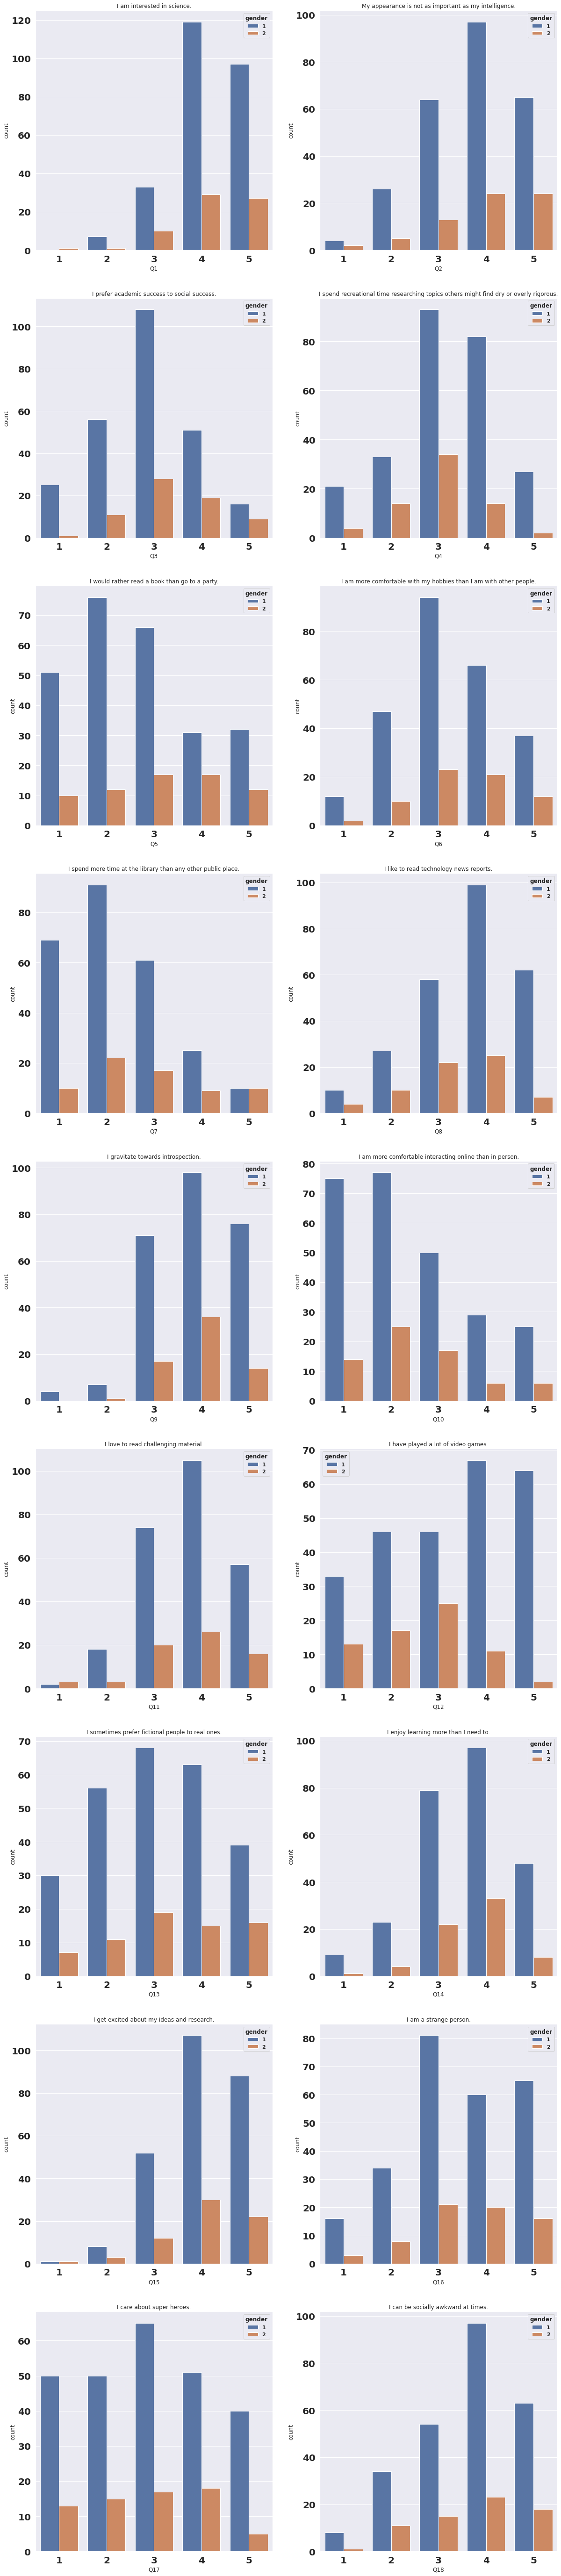

In [190]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font',**font)
plt.figure(figsize=(20,100))
i=1

sns.set_theme(style='darkgrid')
for row in range(9):
    for column in range(2):
        plt.subplot(9,2,i)
        sns.countplot(x='Q'+str(i),data=test,hue="gender")
       
        plt.yticks(size=20)
        plt.xticks(size=20)
        
        plt.title("{title}".format(title=Q_cols["Q"+str(i)]))
        i=i+1

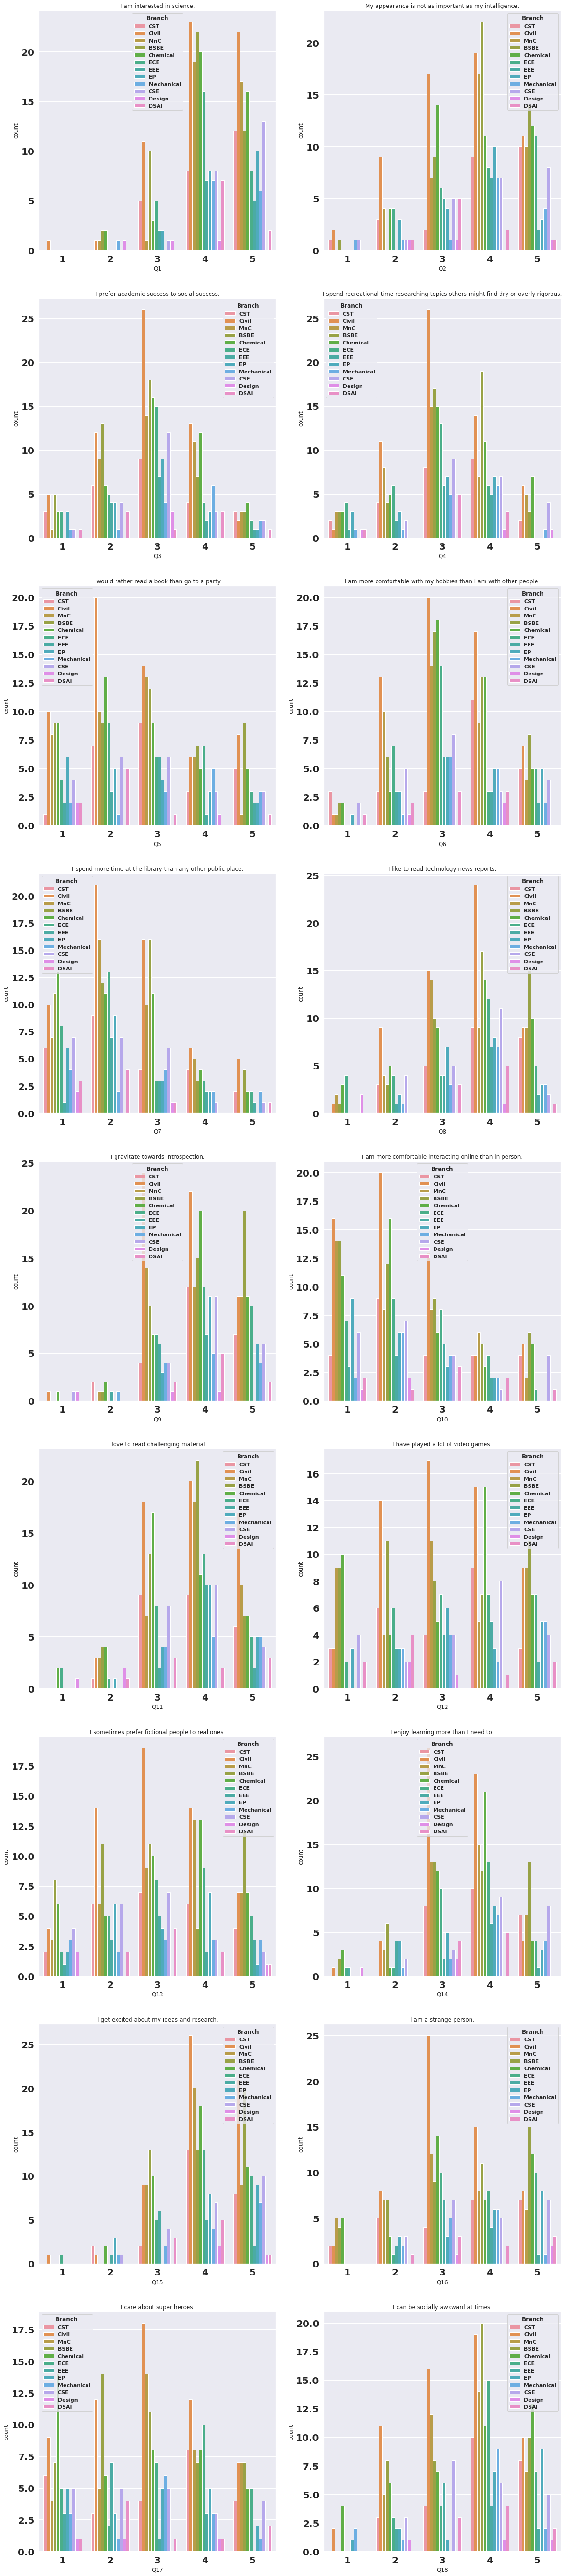

In [191]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font',**font)
plt.figure(figsize=(20,100))
i=1

sns.set_theme(style='darkgrid')
for row in range(9):
    for column in range(2):
        plt.subplot(9,2,i)
        sns.countplot(x='Q'+str(i),data=test,hue="Branch")
       
        plt.yticks(size=20)
        plt.xticks(size=20)
        
        plt.title("{title}".format(title=Q_cols["Q"+str(i)]))
        i=i+1

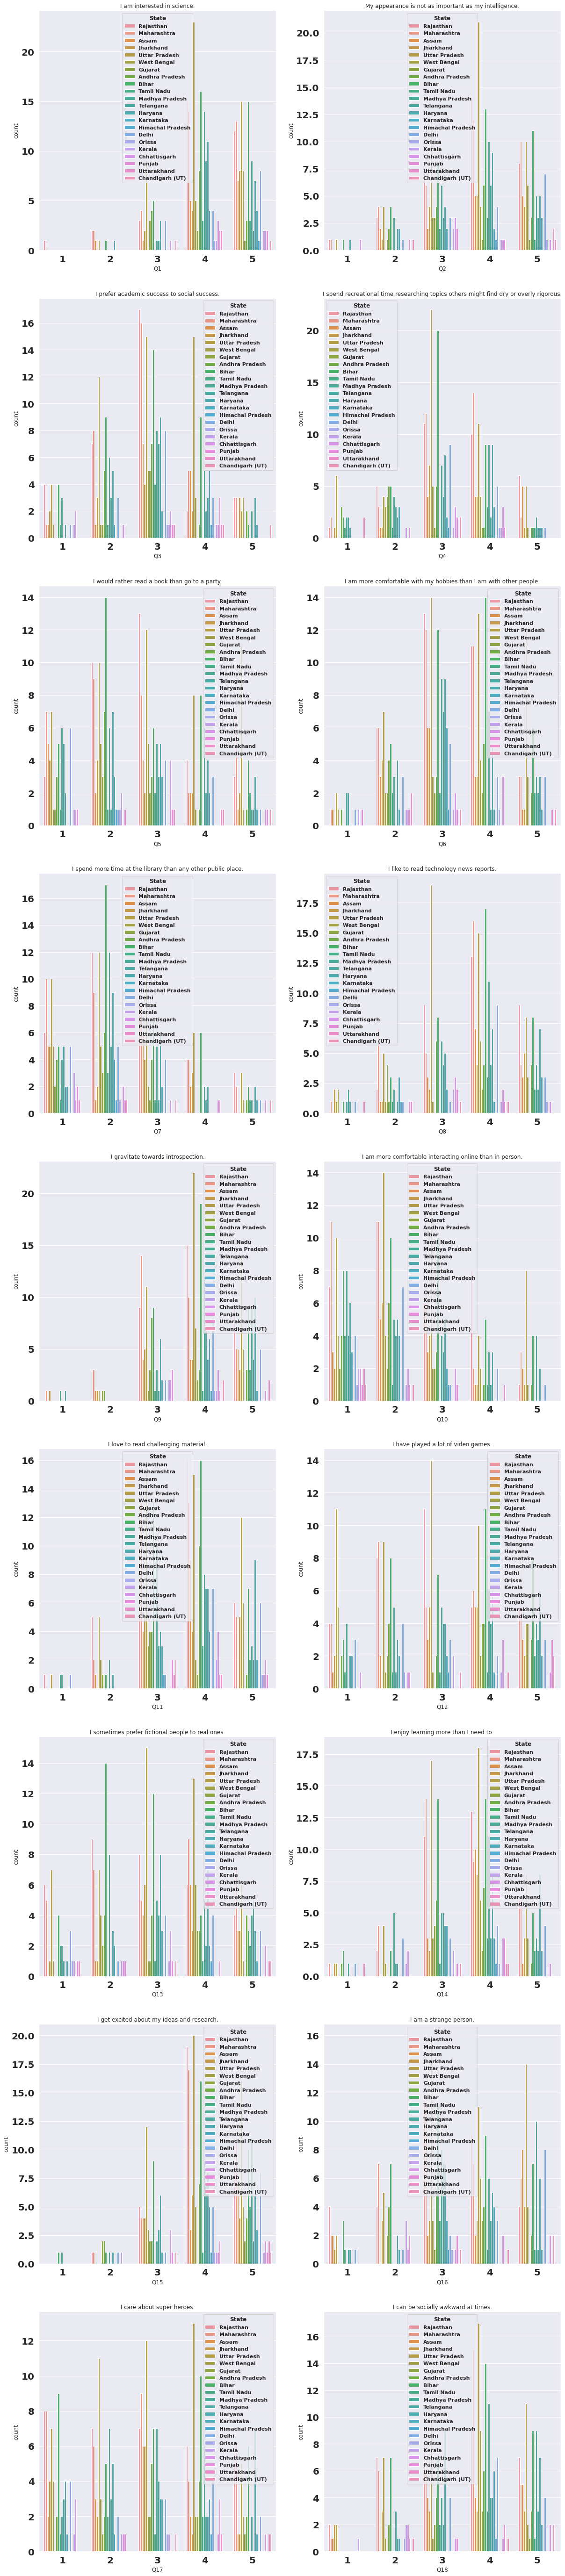

In [192]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font',**font)
plt.figure(figsize=(20,100))
i=1

sns.set_theme(style='darkgrid')
for row in range(9):
    for column in range(2):
        plt.subplot(9,2,i)
        sns.countplot(x='Q'+str(i),data=test,hue="State")
       
        plt.yticks(size=20)
        plt.xticks(size=20)
        
        plt.title("{title}".format(title=Q_cols["Q"+str(i)]))
        i=i+1

In [193]:
# test.corr().T.style.background_gradient('copper_r')
test[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'TIPI1', 'TIPI2',
       'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'Boat', 'Incoherent', 'Pallid', 'Robot', 'Audible', 'Cuivocal',
       'Paucity', 'Epistemology', 'Florted', 'Pastiche', 'Verborse',
       'Abysmal', 'Lucid', 'Betray','gender']].corr().T.style.background_gradient('copper_r')

# plt.figure(figsize=(8,8)) 
# plt.show()  

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Boat,Incoherent,Pallid,Robot,Audible,Cuivocal,Paucity,Epistemology,Florted,Pastiche,Verborse,Abysmal,Lucid,Betray,gender
Q1,1.000000,0.165204,0.184864,0.088267,0.114280,0.036860,0.068368,0.152657,0.036463,0.015811,0.312744,0.108176,-0.022196,0.330626,0.296034,0.030602,0.102703,-0.010692,0.039159,0.034979,0.151025,-0.052185,0.116255,-0.054558,0.057246,-0.124562,0.151311,-0.059686,-0.021309,0.025900,0.076521,-0.002447,-0.028227,0.030570,0.020714,0.081831,0.021318,-0.054189,0.009202,0.077983,0.080410,-0.015726,-0.009862
Q2,0.165204,1.000000,0.125881,0.023475,0.119705,0.181531,0.063321,0.180575,0.153541,0.016020,0.127770,0.005817,0.041279,0.135663,0.157268,0.131121,-0.020232,0.102005,0.089246,-0.013110,0.004754,-0.041077,0.100065,0.012294,0.006400,-0.022904,0.058142,0.014681,-0.018783,0.016318,0.078078,0.070644,0.028977,0.026945,0.036294,-0.067543,-0.046296,-0.026963,-0.073420,-0.067894,-0.037923,0.004287,0.069659
Q3,0.184864,0.125881,1.000000,0.025580,0.205778,0.115319,0.146379,-0.127845,0.000278,0.094538,0.017045,-0.013877,0.035755,0.050961,-0.007261,-0.083809,-0.020318,-0.068825,-0.043048,-0.052684,0.093087,-0.003042,-0.143928,0.060946,0.005696,-0.119058,0.075772,0.071895,0.029147,0.061281,0.044598,-0.013655,-0.023105,-0.000615,0.043162,-0.011206,0.079563,-0.014981,0.088137,0.122096,0.070942,0.034597,0.175760
Q4,0.088267,0.023475,0.025580,1.000000,0.182179,0.090787,0.178653,0.194913,0.224760,-0.025522,0.147000,0.025178,-0.052984,0.214104,0.257824,0.131278,-0.054989,-0.078653,0.109872,-0.076446,0.040899,-0.077656,0.103564,-0.021794,0.016891,0.007594,-0.011503,-0.081088,-0.049124,0.026665,0.017746,0.023195,-0.001532,0.041112,0.047644,0.106626,0.020188,0.005111,0.085834,0.010222,0.092138,-0.067535,-0.116578
Q5,0.114280,0.119705,0.205778,0.182179,1.000000,0.358012,0.500371,0.124831,0.168390,0.192324,0.047040,-0.104538,0.160294,0.221304,0.163264,0.131258,0.075687,0.108735,-0.025798,0.047845,-0.015759,0.092834,-0.036932,0.130595,-0.022175,-0.026157,-0.003926,-0.049272,-0.094286,-0.012322,0.044629,0.029311,-0.066811,0.145932,0.069264,0.065728,-0.004737,0.073173,0.013616,0.070701,0.058673,-0.082260,0.144137
Q6,0.036860,0.181531,0.115319,0.090787,0.358012,1.000000,0.294583,0.016788,0.140818,0.178913,-0.084631,-0.045592,0.131408,0.071522,0.121000,0.102173,-0.000272,0.243681,-0.136727,-0.036946,0.025370,0.074251,0.001723,0.269755,0.018322,0.017233,0.092121,0.130882,0.015618,-0.040639,0.032297,0.022548,-0.025539,0.014632,-0.062314,0.004271,0.073187,0.018961,-0.026394,0.065921,0.034548,0.011525,0.071484
Q7,0.068368,0.063321,0.146379,0.178653,0.500371,0.294583,1.000000,0.168030,0.131318,0.138837,0.109696,-0.106114,0.191375,0.182898,0.186907,0.137726,0.156831,0.047962,-0.057866,-0.018291,0.072808,0.081889,-0.040188,0.047154,0.035360,-0.068486,-0.048144,-0.078502,-0.101596,0.059477,0.125773,0.037009,-0.089917,0.177571,0.056873,0.035334,0.109226,0.040102,-0.012957,-0.016447,0.031623,-0.115129,0.187976
Q8,0.152657,0.180575,-0.127845,0.194913,0.124831,0.016788,0.168030,1.000000,0.234686,0.137651,0.343301,0.070000,0.065393,0.316173,0.320968,0.038206,0.101362,0.058233,0.056572,-0.045918,0.137790,-0.038640,0.176292,-0.046846,-0.002703,-0.081540,0.056552,-0.119628,-0.097375,0.008066,0.058387,0.001647,-0.064280,0.045362,0.058104,0.128571,0.092318,0.066781,0.044895,-0.082371,-0.057537,-0.116211,-0.143677
Q9,0.036463,0.153541,0.000278,0.224760,0.168390,0.140818,0.131318,0.234686,1.000000,0.096947,0.202822,-0.012197,0.027810,0.252251,0.331827,0.304904,0.011962,0.107424,0.086997,-0.102562,0.104898,0.013423,0.119971,-0.005682,0.211460,-0.104330,-0.011002,-0.104840,0.076843,0.147532,-0.008544,0.047338,0.059875,0.055161,0.036180,0.078456,-0.028172,-0.064267,0.040901,-0.008151,0.209940,0.118040,0.003990
Q10,0.015811,0.016020,0.094538,-0.025522,0.192324,0.178913,0.138837,0.137651,0.096947,1.000000,-0.127350,-0.120837,0.154043,0.018077,-0

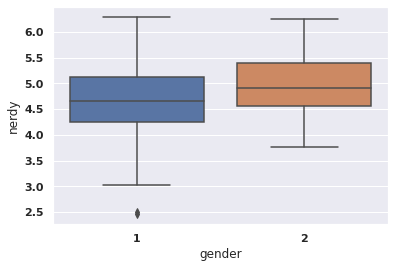

In [194]:
sns.boxplot(x = test['gender'], y= test['nerdy'])

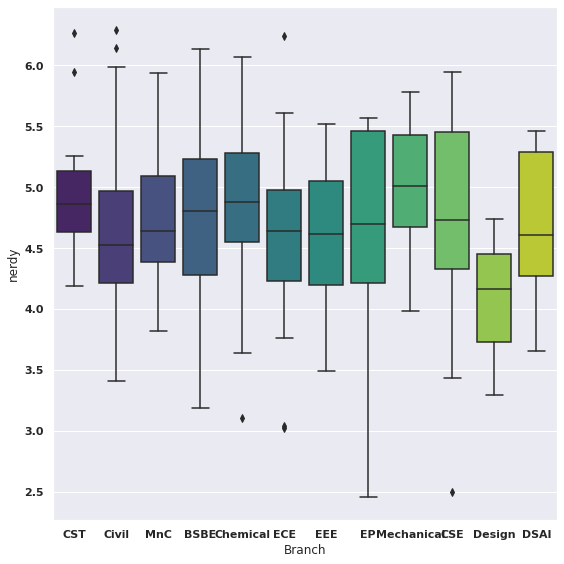

In [201]:
plt.figure(figsize=(8,8))
sns.boxplot(x = test['Branch'], y= test['nerdy'],palette='viridis')
plt.tight_layout()

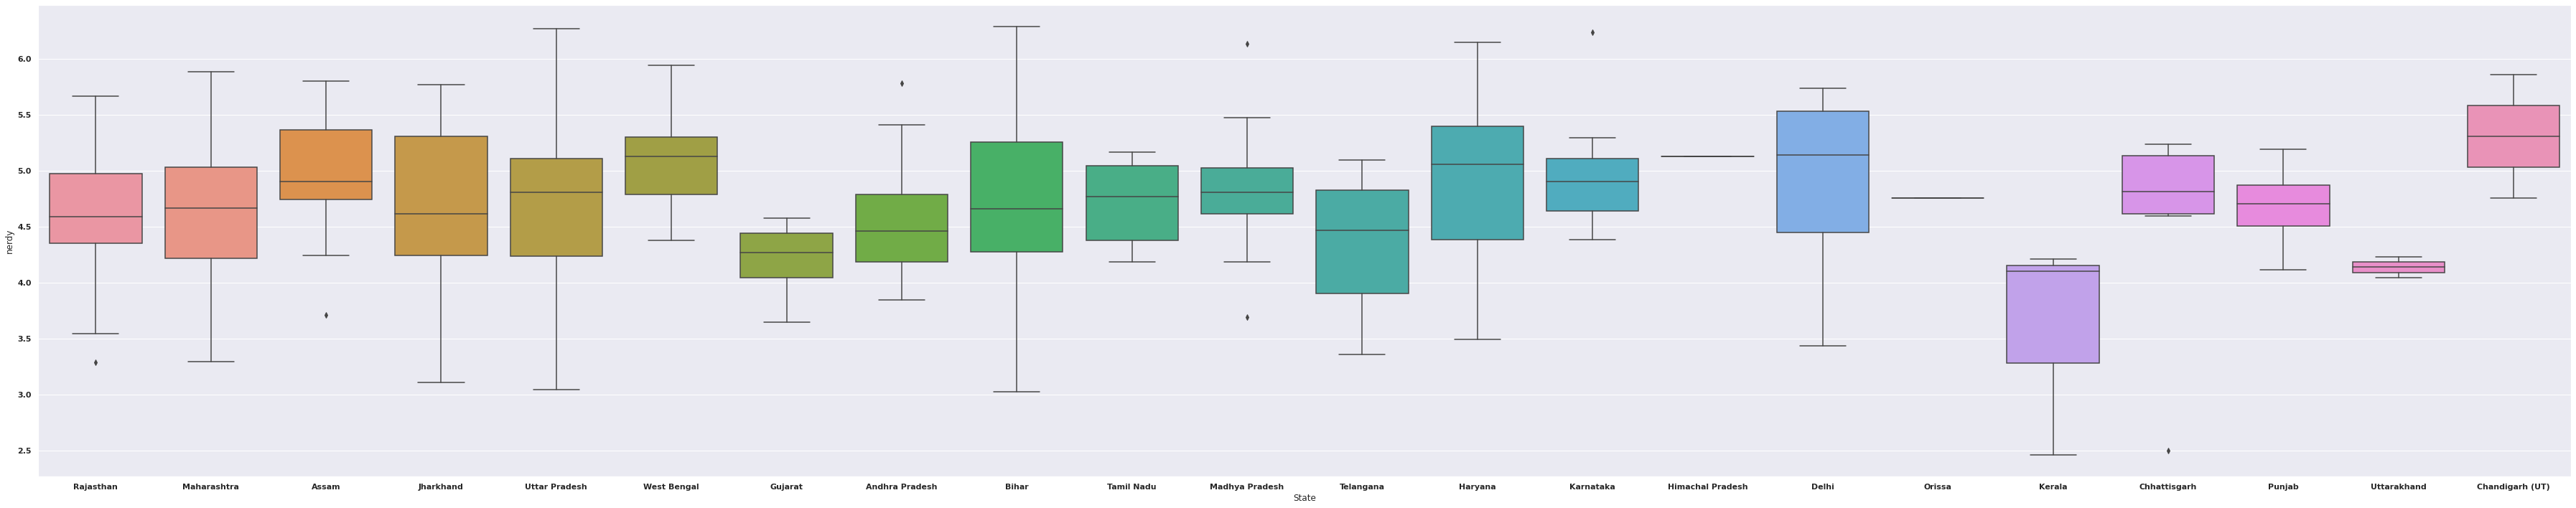

In [196]:
plt.figure(figsize=(50,10))
sns.boxplot(x = test['State'], y= test['nerdy'])
plt.tight_layout()

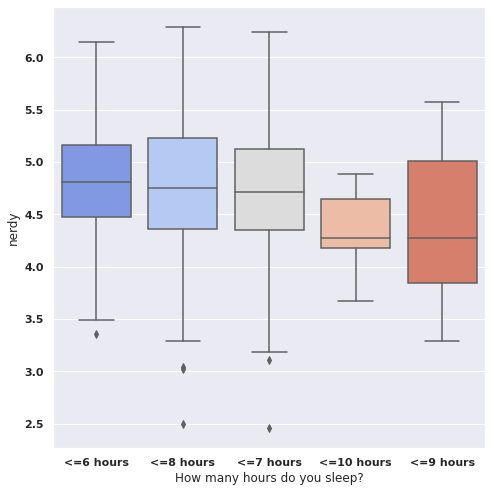

In [202]:
plt.figure(figsize=(7,7))
sns.boxplot(x = test['How many hours do you sleep?'], y= test['nerdy'],palette='coolwarm')
plt.tight_layout()

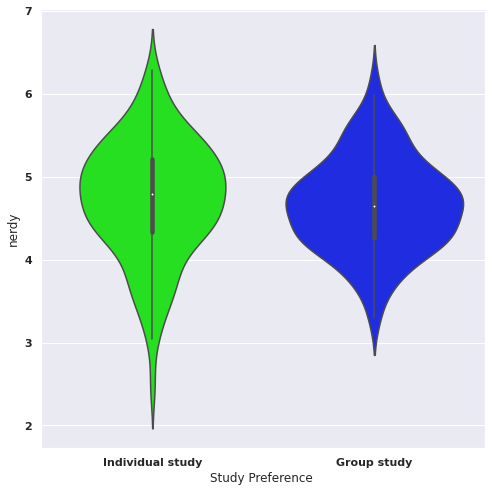

In [205]:
plt.figure(figsize=(7,7))
sns.violinplot(x = test['Study Preference '], y= test['nerdy'],palette='hsv')
plt.tight_layout()

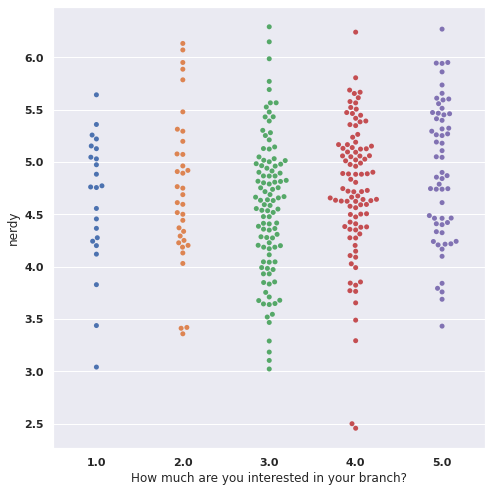

In [204]:
plt.figure(figsize=(7,7))
sns.swarmplot(x = test['How much are you interested in your branch?'], y= test['nerdy'])
plt.tight_layout()

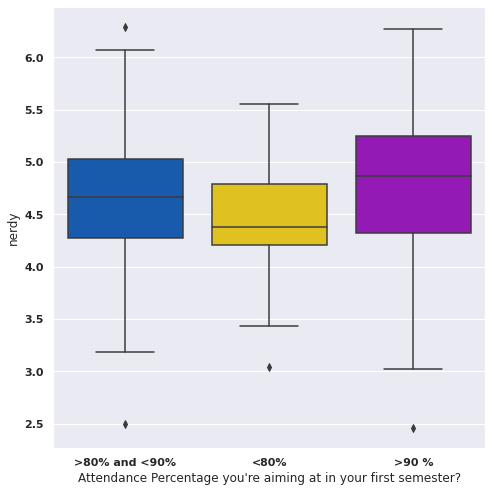

In [207]:
plt.figure(figsize=(7,7))
sns.boxplot(x = test["Attendance Percentage you're aiming at in your first semester?"], y= test['nerdy'],palette='prism')
plt.tight_layout()

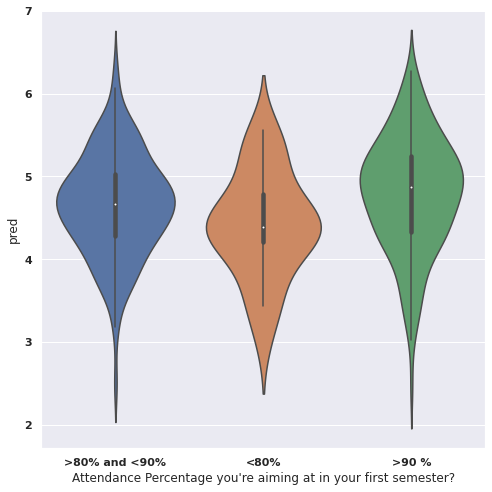

In [137]:
# plt.figure(figsize=(7,7))
# sns.violinplot(x = test["Attendance Percentage you're aiming at in your first semester?"], y= test['nerdy'])
# plt.tight_layout()

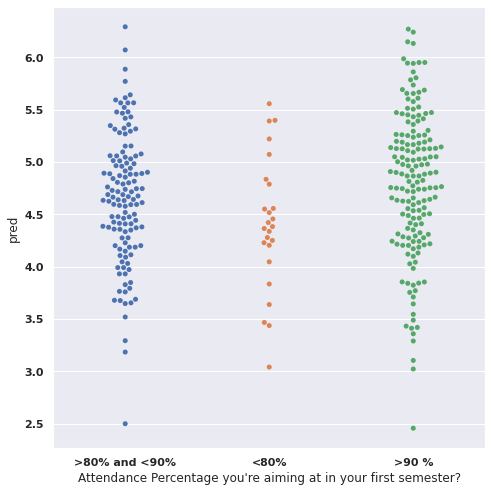

In [138]:
# plt.figure(figsize=(7,7))
# sns.swarmplot(x = test["Attendance Percentage you're aiming at in your first semester?"], y= test['nerdy'])
# plt.tight_layout()

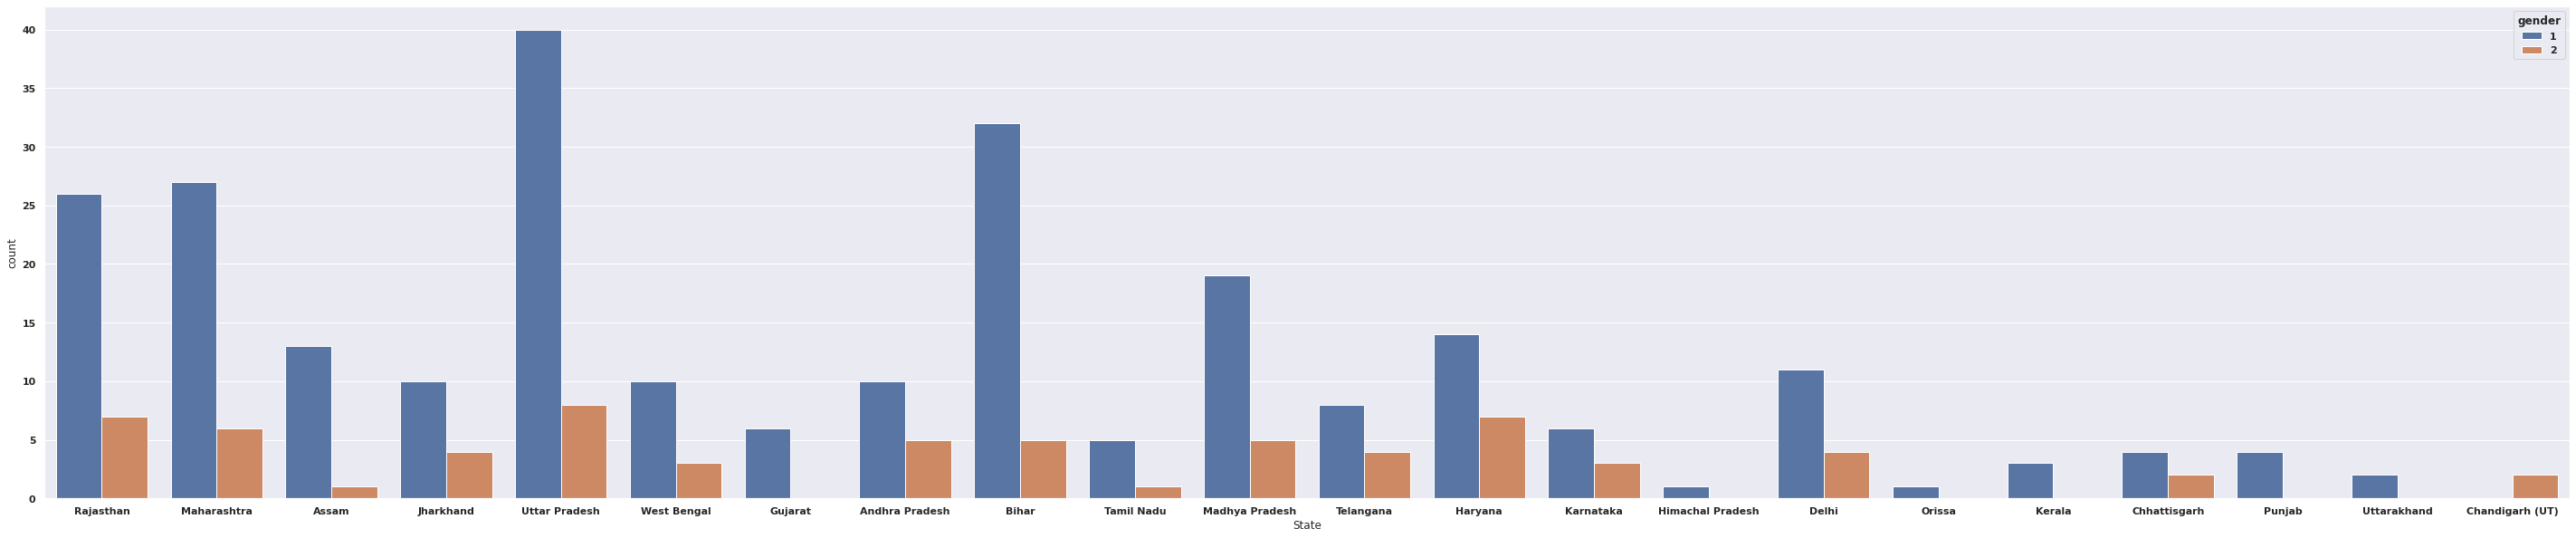

In [211]:

plt.figure(figsize=(50,10))
sns.countplot(x="State",data=test,hue="gender")